In [39]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import Image
import time
import random
import pandas as pd
import os

In [34]:
def file_to_dict(file):
    with open(f"hopper/{file}") as f:
        test_case = f.read()
        
    test_case_spl = test_case.split("\n")

    n = int(test_case_spl[0])
    bin_sizes = test_case_spl[1].split(" ")
    bin_w = int(bin_sizes[0])
    bin_h = int(bin_sizes[1])
    rects = test_case_spl[2:]

    items = []
    i=1

    for rect in rects:
        rect = rect.split(" ")
        item = {
            "id": i,
            "w": int(rect[0]),
            "h": int(rect[1]),
            "a": int(rect[0])*int(rect[1]),
            "x": 0,
            "y": 0
        }
        i += 1
        items.append(item)

    return n, bin_w, bin_h, items

def fill_sub_matrix(matrix, i, j, w, h, id):
    matrix[i-h+1:i+1, j:j+w] = id
    return matrix

def find_sub_matrix(matrix, bin_h, bin_w, w, h):
    for i in range(bin_h-1, h-2, -1):
        for j in range(bin_w-w+1):
            sub_matrix = matrix[i-h+1:i+1, j:j+w]
            if np.all(sub_matrix==0):
                return i,j
    return -1

def result(matrix):
    empty = len(np.argwhere(matrix==0))
    matrix_shape = matrix.shape
    full = (matrix_shape[0] * matrix_shape[1])
    fill = (matrix_shape[0] * matrix_shape[1]) - empty
    rate = fill / full
    return [full, fill, empty, rate*100]
    # print("Box:\t{}\nFill:\t{}\nEmpty:\t{}\nRate:\t%{:.2f}\n".format(full, fill, empty, rate*100))
    
def result2(matrix):
    empty = len(np.argwhere(matrix==0))
    matrix_shape = matrix.shape
    full = (matrix_shape[0] * matrix_shape[1])
    fill = (matrix_shape[0] * matrix_shape[1]) - empty
    rate = fill / full
    print("Box:\t{}\nFill:\t{}\nEmpty:\t{}\nRate:\t%{:.2f}\n".format(full, fill, empty, rate*100))


# Sort Items

In [30]:
def no_sort(items):
    return items

def max_h_first(items):
    items = sorted(items, key=lambda k:k['h'], reverse=True)
    return items

def max_w_first(items):
    items = sorted(items, key=lambda k:k['w'], reverse=True)
    return items

def max_area_first(items):
    items = sorted(items, key=lambda k:k['a'], reverse=True)
    return items

def min_h_first(items):
    items = sorted(items, key=lambda k:k['h'])
    return items

def min_w_first(items):
    items = sorted(items, key=lambda k:k['w'])
    return items

def min_area_first(items):
    items = sorted(items, key=lambda k:k['a'])
    return items

# Success rate for each file

In [37]:
results = []
files = os.listdir("hopper")
funcs = [no_sort, max_h_first, max_w_first, max_area_first, min_h_first, min_w_first, min_area_first]
for func in funcs:
    for file in files:
        n, bin_w, bin_h, items = file_to_dict(file)
        matrix = np.zeros((bin_h, bin_w))
        items = func(items)
        for item in items:
            w = item['w']
            h = item['h']
            id = item['id']
            a = find_sub_matrix(matrix, bin_h, bin_w, w,h)
            if a != -1:
                matrix = fill_sub_matrix(matrix,a[0], a[1], w, h, id)
        res = result(matrix)
        results.append([file, func.__name__, res[0], res[1], res[2], res[3]])


In [86]:
df = pd.read_csv("res.txt")
pd.reset_option('max_columns')
pd.set_option('display.max_rows', None)
df

,file,function,box,filled,empty,rate
0,C1_1,no_sort,400,400,0,100.00
1,C1_2,no_sort,400,400,0,100.00
2,C1_3,no_sort,400,400,0,100.00
3,C2_1,no_sort,3600,1800,0,100.00
4,C2_2,no_sort,3600,1800,0,100.00
5,C2_3,no_sort,3600,1800,0,100.00
6,C3_1,no_sort,1600,600,0,100.00
7,C3_2,no_sort,1600,600,0,100.00
8,C3_3,no_sort,1600,600,0,100.00
9,C4_1,no_sort,3600,3600,0,100.00


In [32]:
files = os.listdir("hopper")
for file in files:
    print(file)
    n, bin_w, bin_h, items = file_to_dict(file)
    matrix = np.zeros((bin_h, bin_w))
    items = max_area_first(items)
    for item in items:
        w = item['w']
        h = item['h']
        id = item['id']
        a = find_sub_matrix(matrix, bin_h, bin_w, w,h)
        if a != -1:
            matrix = fill_sub_matrix(matrix,a[0], a[1], w, h, id)
    result2(matrix)



C1_1
Box:	400
Fill:	400
Empty:	0
Rate:	%100.00

C1_2
Box:	400
Fill:	400
Empty:	0
Rate:	%100.00

C1_3
Box:	400
Fill:	400
Empty:	0
Rate:	%100.00

C2_1
Box:	1800
Fill:	1800
Empty:	0
Rate:	%100.00

C2_2
Box:	1800
Fill:	1800
Empty:	0
Rate:	%100.00

C2_3
Box:	1800
Fill:	1800
Empty:	0
Rate:	%100.00

C3_1
Box:	600
Fill:	600
Empty:	0
Rate:	%100.00

C3_2
Box:	600
Fill:	600
Empty:	0
Rate:	%100.00

C3_3
Box:	600
Fill:	600
Empty:	0
Rate:	%100.00

C4_1
Box:	3600
Fill:	3600
Empty:	0
Rate:	%100.00

C4_2
Box:	3600
Fill:	3600
Empty:	0
Rate:	%100.00

C4_3
Box:	3600
Fill:	3600
Empty:	0
Rate:	%100.00

C5_1
Box:	5400
Fill:	5400
Empty:	0
Rate:	%100.00

C5_2
Box:	5400
Fill:	5400
Empty:	0
Rate:	%100.00

C5_3
Box:	5400
Fill:	5400
Empty:	0
Rate:	%100.00

C6_1
Box:	9600
Fill:	9600
Empty:	0
Rate:	%100.00

C6_2
Box:	9600
Fill:	9600
Empty:	0
Rate:	%100.00

C6_3
Box:	9600
Fill:	9600
Empty:	0
Rate:	%100.00

C7_1
Box:	38400
Fill:	38400
Empty:	0
Rate:	%100.00

C7_2
Box:	38400
Fill:	38400
Empty:	0
Rate:	%100.00

C7_3
Box

# Animation for packing

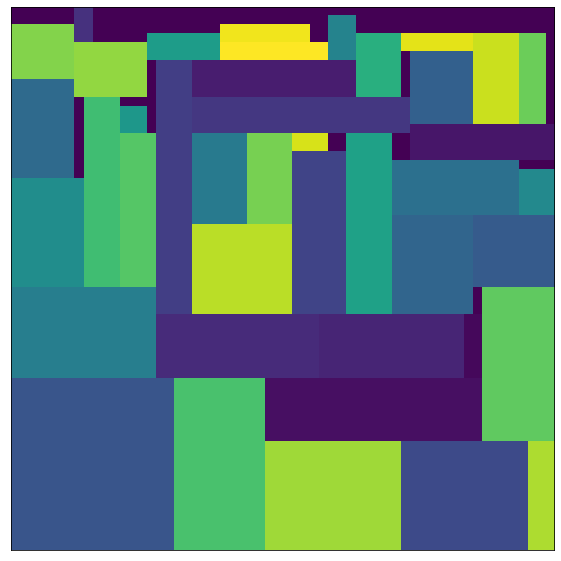

In [88]:
file = "C4_1"
n, bin_w, bin_h, items = file_to_dict(file)

matrix = np.zeros((bin_h, bin_w))
plt.rcParams['figure.figsize'] = [10, 10]
items = max_area_first(items)
for item in items:
    w = item['w']
    h = item['h']
    id = item['id']

    a = find_sub_matrix(matrix, bin_h, bin_w, w,h)
    if a != -1:
        matrix = fill_sub_matrix(matrix,a[0], a[1], w, h, id)
        plt.imshow(matrix)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        display.clear_output(wait=True)
        # time.sleep(0.2)
        item['x'] = a[1]
        item['y'] = 19-a[0]


# ID for each rectangle

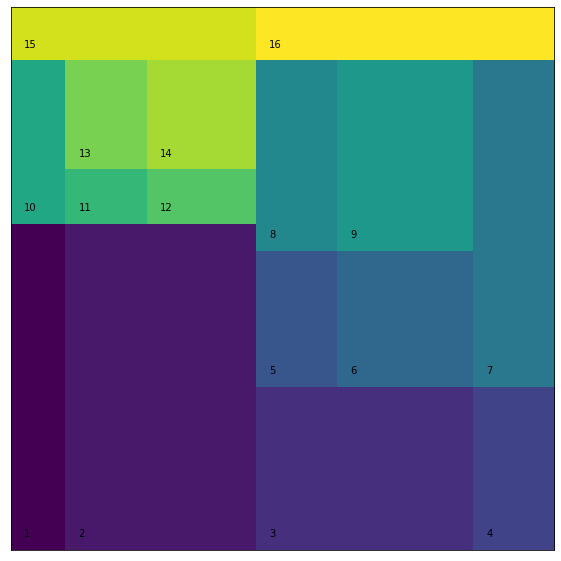

In [10]:
plt.imshow(matrix)
plt.xticks([])
plt.yticks([])
plt.rcParams['figure.figsize'] = [10, 10]
for item in items:
    x = item['x']
    y = 19-item['y']
    plt.text(x,y, item['id'])
plt.show()

# GCODE Generate

In [6]:
def gcode_gen(x, y, w, h):
    item_gcode=f"""M03 S250
G4 P0.5
G0 X{x} Y{y}
M03 S90
G4 P0.5
G1 X{x+w} Y{y}
G1 X{x+w} Y{y+h}
G1 X{x} Y{y+h}
G1 X{x} Y{y}"""
    return item_gcode

In [8]:
gcode = """G1 F1000
G21
G90
"""
mm = 10
for item in items:
    item_gcode = gcode_gen(item['x']*mm, item['y']*mm, item['w']*mm, item['h']*mm)
    gcode += item_gcode

with open("gcodes/c1_1.gcode", "w") as f:
    f.write(gcode)

# Inkscape Image

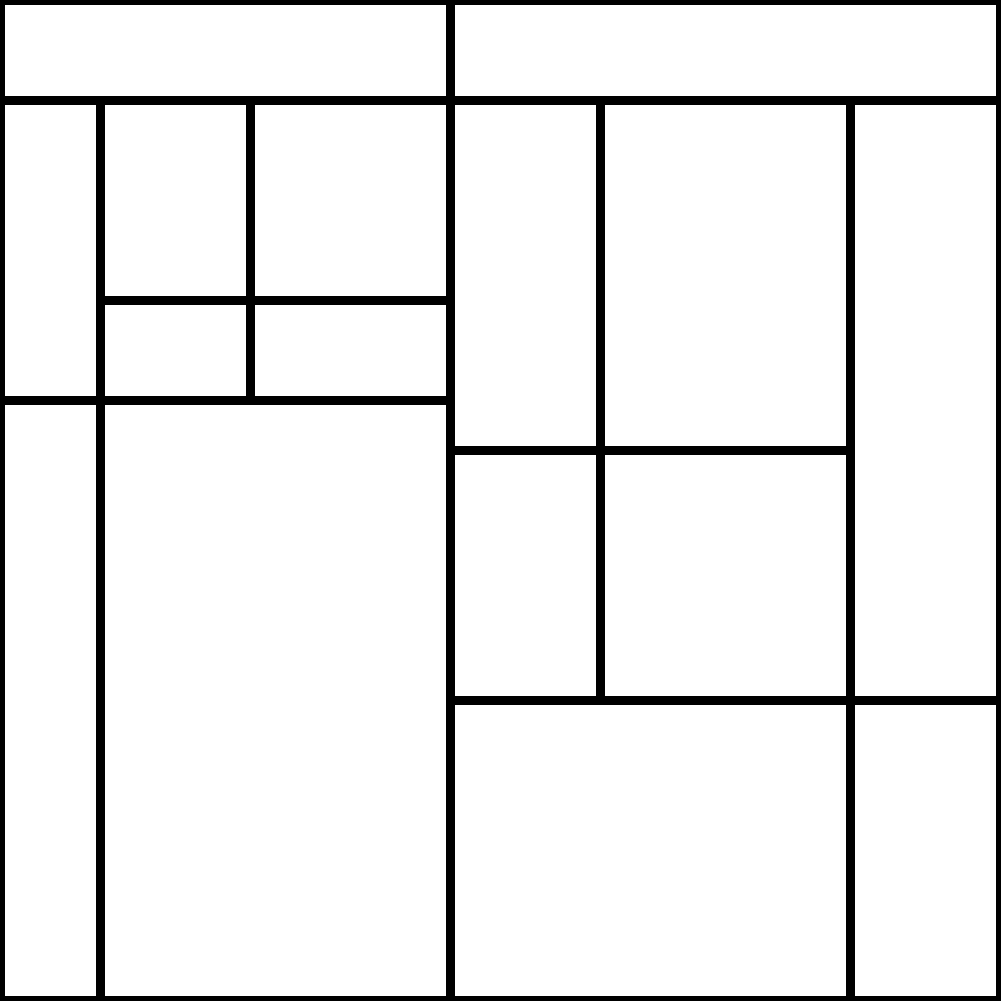

In [28]:
from PIL import Image as PilImage
from PIL import ImageDraw, ImageOps

mm = 50
w, h = 20*mm+1, 20*mm+1
img = PilImage.new("RGB", (w, h)) 

for item in items:
    shape = [(item['x']*mm,(item['y']*mm) ), (item['x']*mm+item['w']*mm,(item['y']*mm+item['h']*mm) )] 
    img1 = ImageDraw.Draw(img)   
    img1.rectangle(shape, fill ="#FFFFFF", outline ="black", width=5) 
img = ImageOps.flip(img)

img.save("images/g1.png")
Image("images/g1.png")

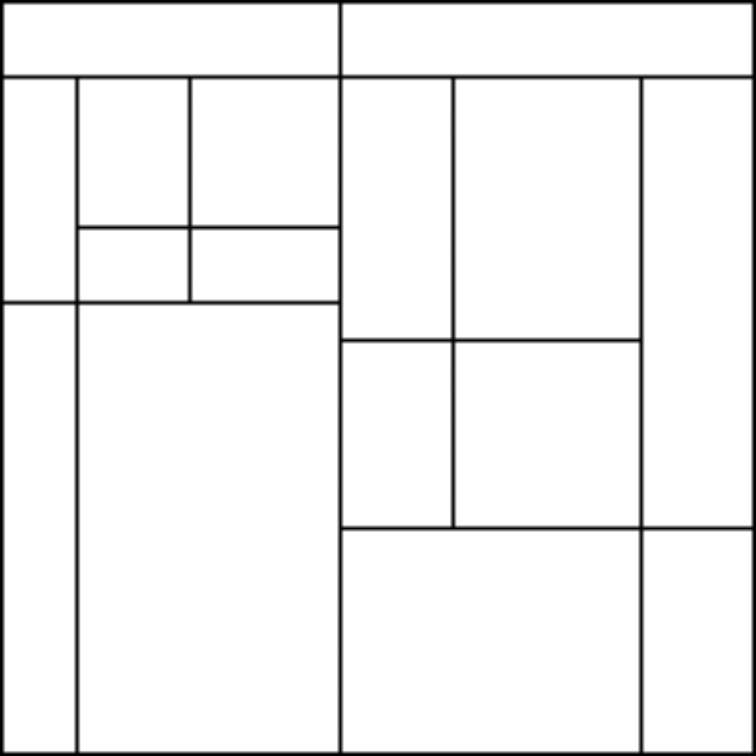

In [9]:
import cv2
im = np.zeros((201,201,3), dtype=np.uint8)
im+=255

for item in items:
    x=item['x']*10
    y=item['y']*10
    w=item['w']*10
    h=item['h']*10
    cv2.rectangle(im,(x,y),(x+w,y+h),(0, 0, 0),1)
im = cv2.resize(im, (756,756))
im = cv2.flip(im, 0)
cv2.imwrite("images/g2.png", im)
Image("images/g2.png")